In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  8]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



In [ ]:
cm1=confusion_matrix(y_test,y_pred)
print(cm1)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


In [ ]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cm2=confusion_matrix(y_test,y_pred)
print(cm2)
accuracy_score(y_test,y_pred)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


0.9666666666666667

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


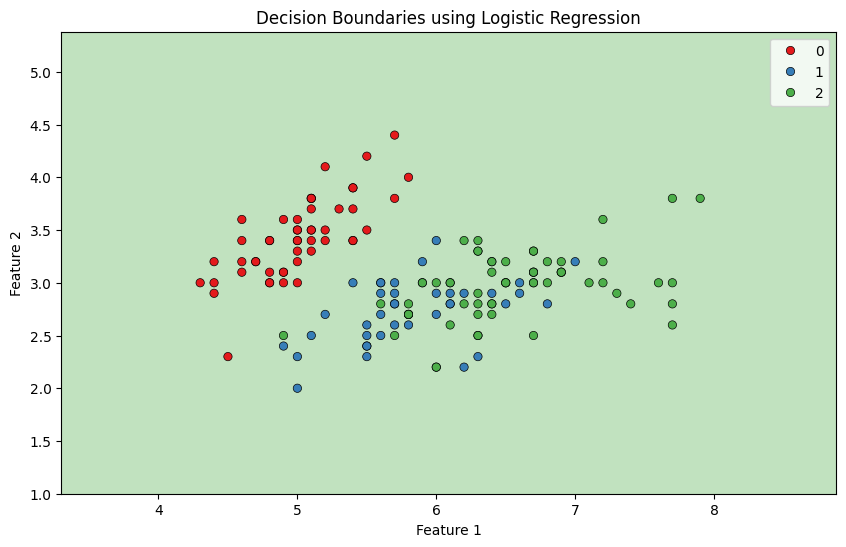

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor='k', ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Boundaries using Logistic Regression')
plt.show()